## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.set_context("paper",  font_scale=1.2)

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv("Mall_Customers.csv")
customer_set.rename(columns = {'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'SpendingScore'}, inplace = True)
customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
print("\n","Розмірність датасету:", customer_set.shape)
print("\n",customer_set.info())
print("\n","Наявність NaN:",customer_set.isnull().values.any())


 Розмірність датасету: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 None

 Наявність NaN: False


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [4]:
customer_set = customer_set.drop('CustomerID', axis = 1)
customer_set.head()

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

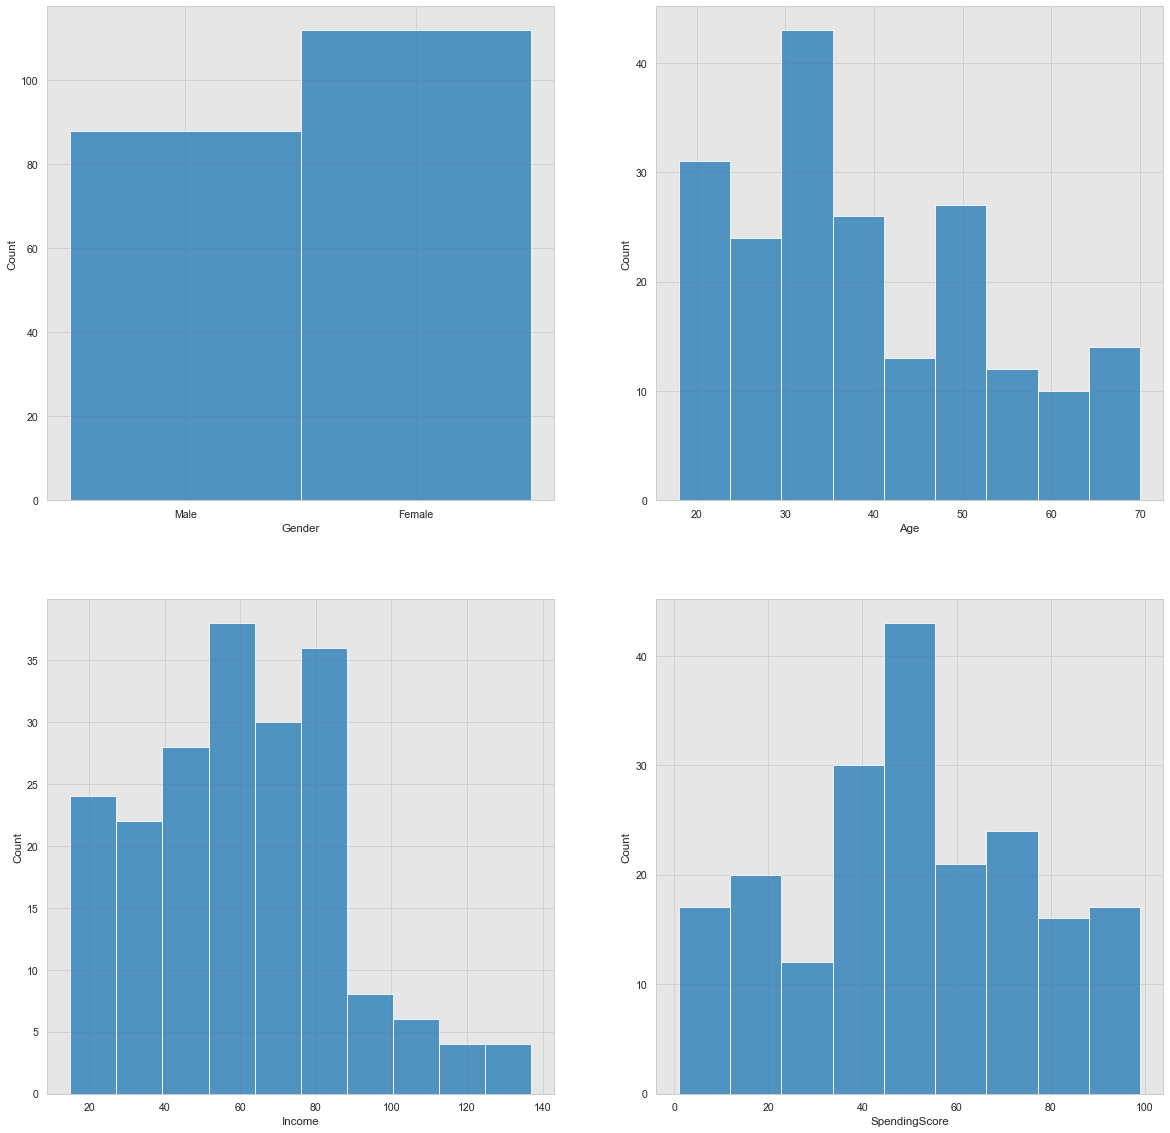

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
for variable, subplot in zip(customer_set, ax.flatten()):
  sns.histplot(x = variable, data = customer_set, ax = subplot)

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

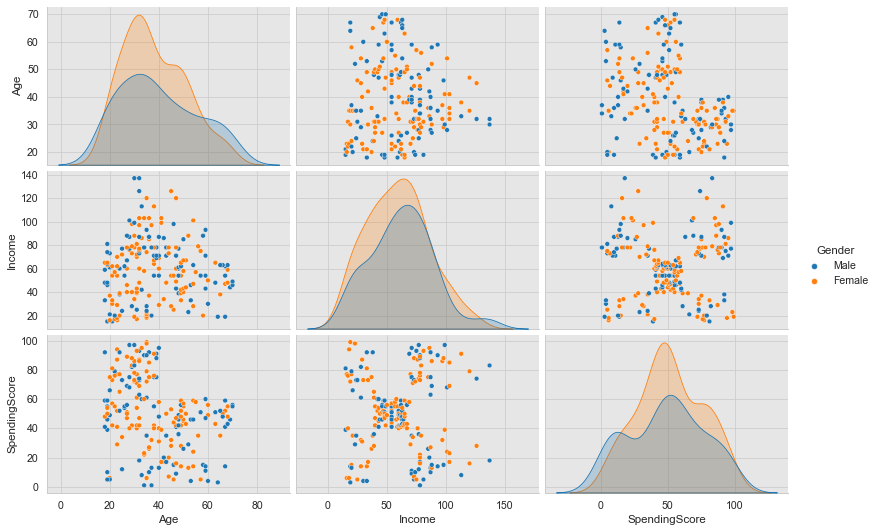

In [6]:
sns.pairplot(customer_set, hue="Gender", aspect=1.5)
plt.show()

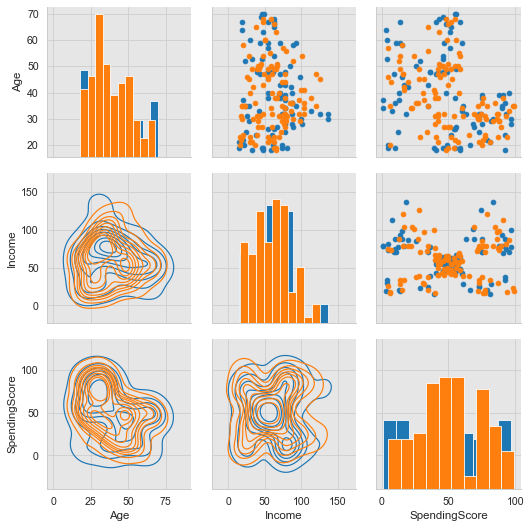

In [7]:
spg = sns.PairGrid(data = customer_set, hue = "Gender")
spg.map_diag(plt.hist)
spg.map_upper(plt.scatter)
spg.map_lower(sns.kdeplot)

**Висновки з 1-4 завдання (детальні)**

1. Датасет 200х5, нан'ів немає.
2. Успішно вилучив змінну CustomerID.
3. Жінок більше, ніж чоловіків. Найбільше людей 30-35р. Найбільше людей з прибутком ~50 i ~80. Найбільше людей які тратять ~50.
4. Побудував, значить ті графіки з крапочками, перше якось нічого не зрозумів, а потім побачив, що ті крапочки збираються в окремі блоки (типу як ті користувачі банку з схожими параметрами), але всерівно, якщо говорити в загальному, то ці змінні не дуже корелюють.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

<AxesSubplot:xlabel='Gender', ylabel='count'>

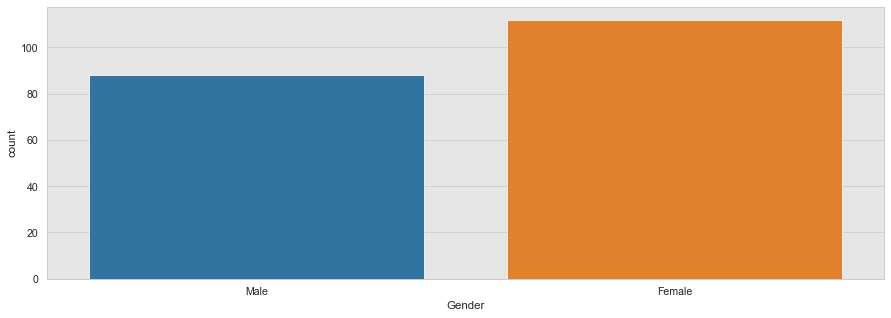

In [8]:
plt.figure(figsize = (15, 5))
sns.countplot(x = 'Gender', data = customer_set)

([<matplotlib.patches.Wedge at 0x23d1bf69fd0>,
 [Text(-0.2079932673569455, 1.0903388467509458, 'Female'),
  Text(0.2248575863318331, -1.1787446991902115, 'Male')],
 [Text(-0.11430260638534842, 0.5991952220883575, '56.0%'),
  Text(0.13116692536023597, -0.6876010745276234, '44.0%')])

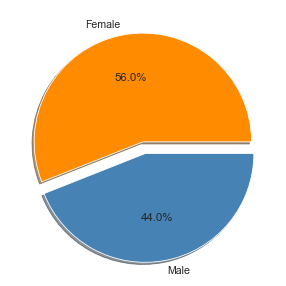

In [9]:
plt.figure(figsize = (15, 5))
plt.pie(customer_set.groupby('Gender').size(), labels = ['Female', 'Male'] , autopct = '%1.1f%%', shadow=True, explode = [0.01, 0.1], colors = ['darkorange', 'steelblue'])

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

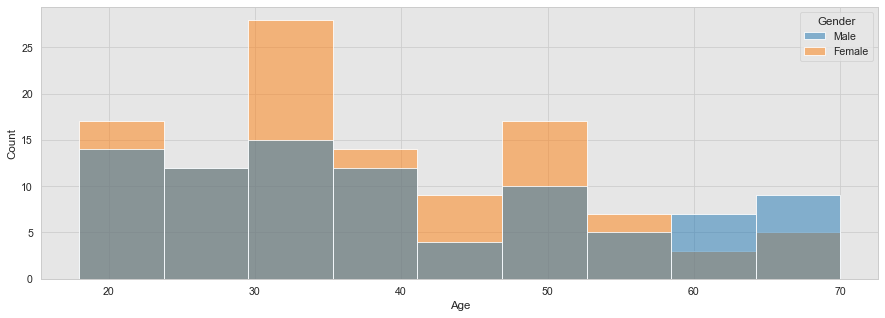

In [10]:
plt.figure(figsize = (15, 5))
sns.histplot(data = customer_set, x = 'Age' , hue = 'Gender')

<AxesSubplot:xlabel='Income', ylabel='Count'>

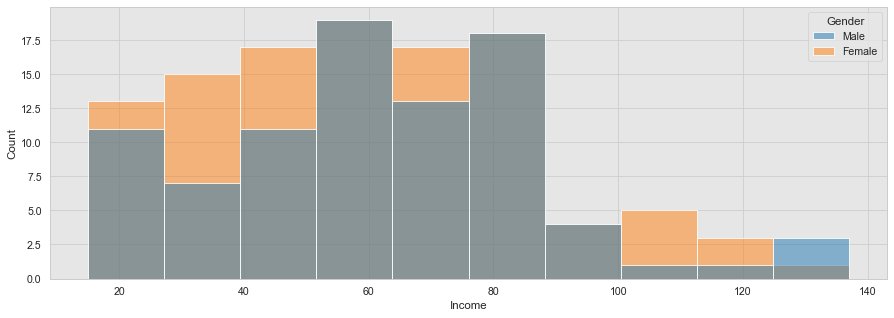

In [11]:
plt.figure(figsize = (15, 5))
sns.histplot(data = customer_set, x = 'Income' , hue = 'Gender')

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



<AxesSubplot:xlabel='SpendingScore', ylabel='Count'>

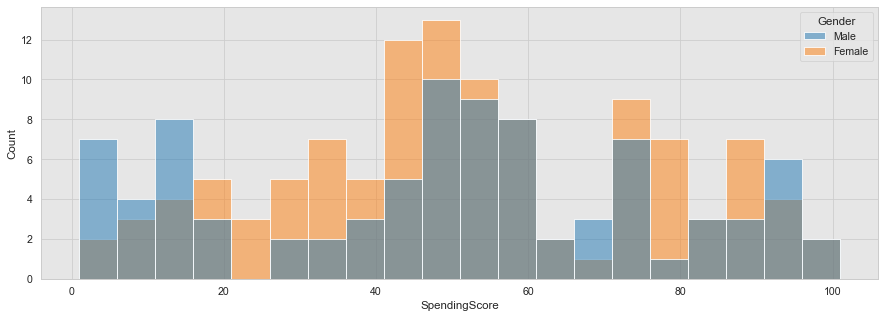

In [12]:
plt.figure(figsize = (15, 5))
sns.histplot(data=customer_set, x = 'SpendingScore', hue = 'Gender', multiple = 'layer', binwidth = 5)

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

<AxesSubplot:xlabel='Gender', ylabel='SpendingScore'>

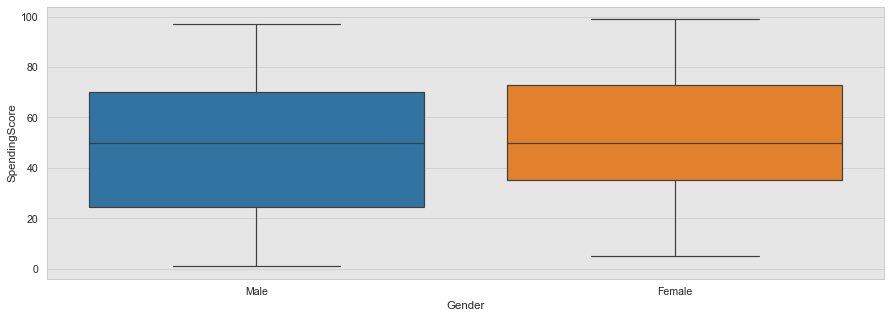

In [13]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = customer_set, x = 'Gender', y = 'SpendingScore')

**Висновки з завдання 5 - 8(детальні)**

5. Жінок більше ніж чоловіків.

6-7. З графіків можемо побачити, що жінок у банку загалом більше ніж чоловіків і вони, переважно, заробляють більше, а отже і тратять більше.

8. Жінки витрачають більше.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

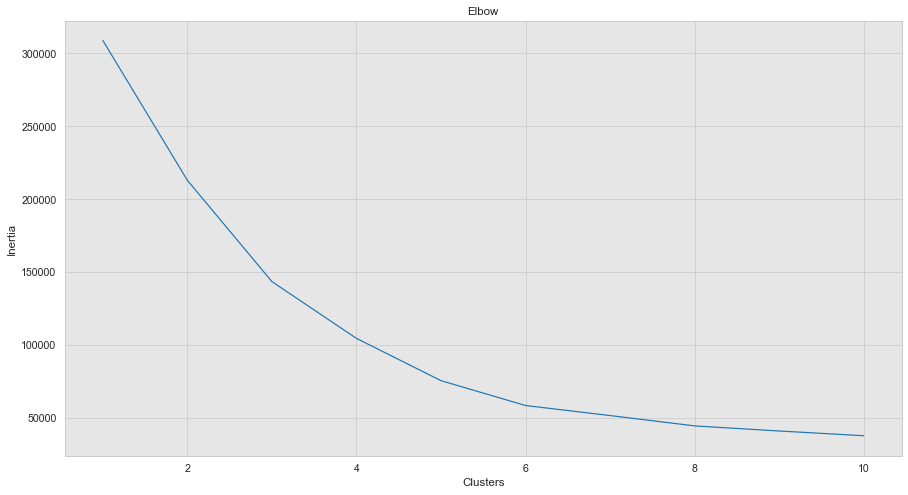

In [14]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i  in range(1, 11):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

З графіка видно, чим більша кількість класерів, тим менша похибка.
Обломи на графіку свідчать проте, що в цій точці є велика різниця між похибками.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

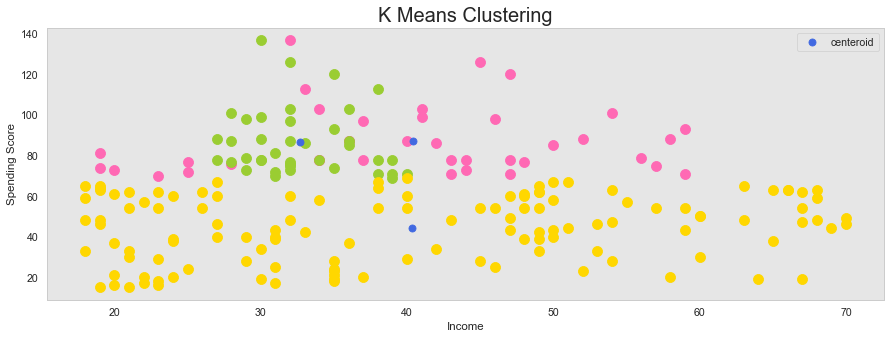

In [40]:
X = customer_set.drop(['Gender'], axis=1).values
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

plt.figure(figsize = (15, 5))

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'hotpink')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellowgreen')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'gold')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orangered')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'royalblue' , label = 'centeroid')


plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Income')
plt.ylabel('Spending Score')

plt.legend()
plt.grid()
plt.show()

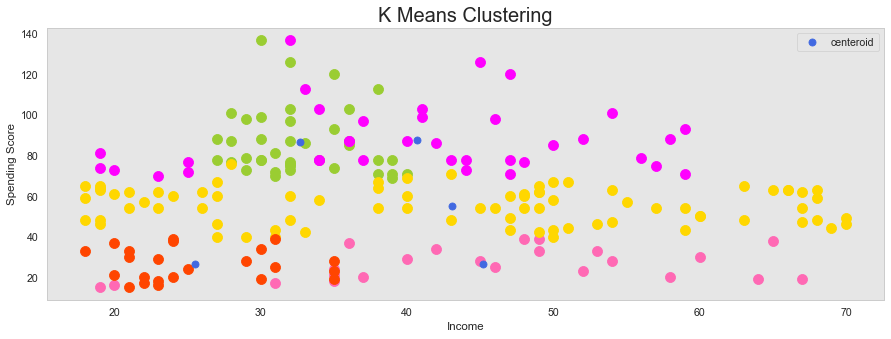

In [41]:
X = customer_set.drop(['Gender'], axis=1).values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

plt.figure(figsize = (15, 5))

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'hotpink')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellowgreen')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'gold')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orangered')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'royalblue' , label = 'centeroid')


plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Income')
plt.ylabel('Spending Score')

plt.legend()
plt.grid()
plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [42]:
df_3d = customer_set.drop(['Gender'], axis=1)
fig = px.scatter_3d(df_3d, x='Age', y='SpendingScore', z='Income', color = km.labels_)
fig.show()

**Висновки з завдання 10 - 11 (детальні)** 

Оптимальна кількість кластерів - 5.
Кількість даних одна, тому якщо брати менше\більше кластерів, то дані які ми отримаємо будуть неповними (і навіть трохи перемішаними).
Кластерний аналіз дає нам розуміння того, скільки типів клієнтів мав банк (на основі їх доходів і витрат).

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


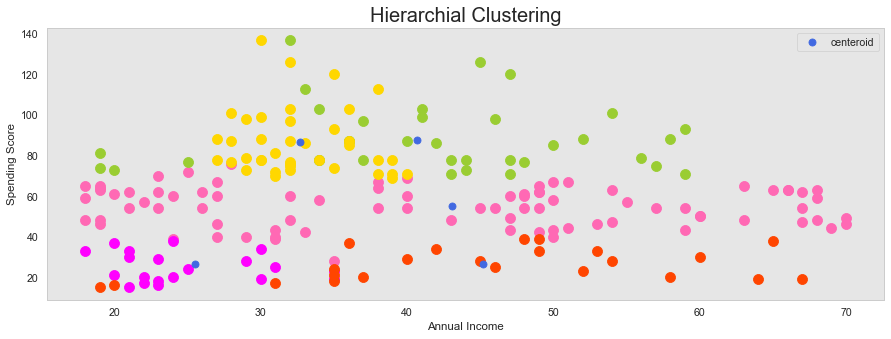

In [43]:
plt.figure(figsize = (15, 5))
X = customer_set.drop(['Gender'], axis=1).values
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'hotpink')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellowgreen')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'gold')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orangered')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'royalblue' , label = 'centeroid')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

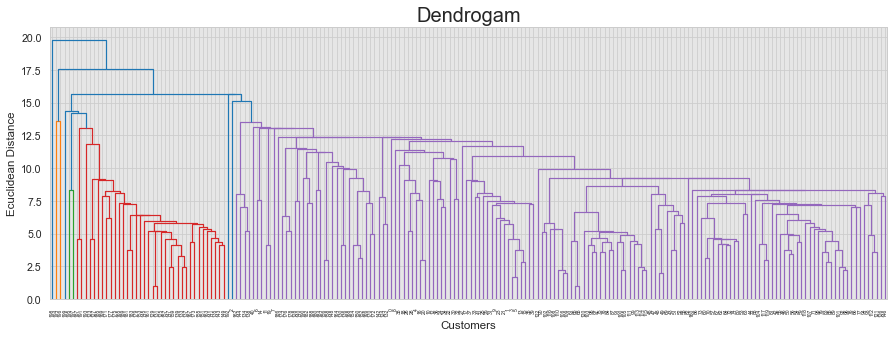

In [19]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'single'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

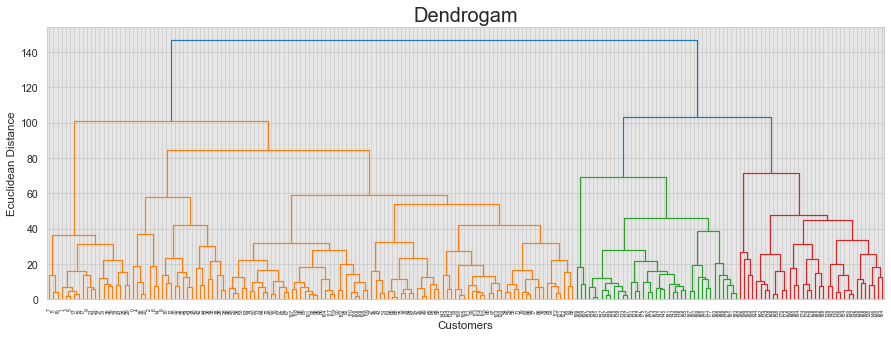

In [20]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

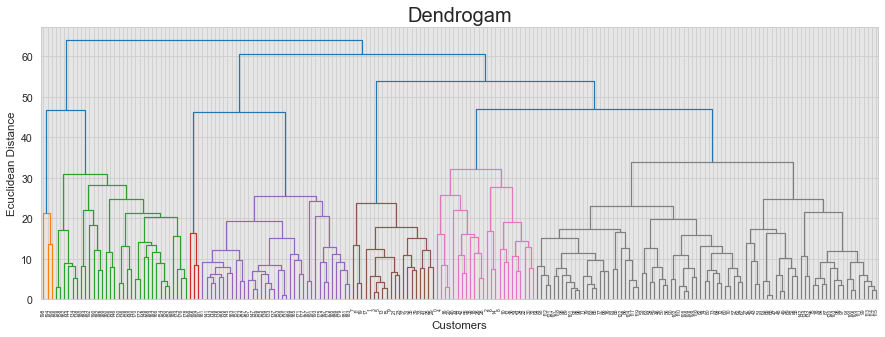

In [21]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'average'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

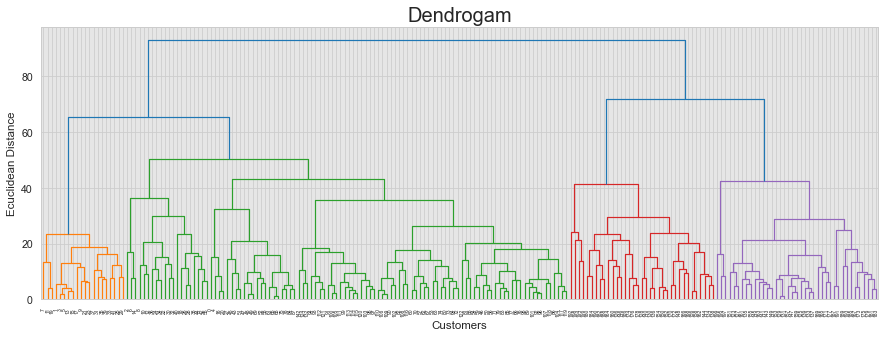

In [22]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'weighted'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

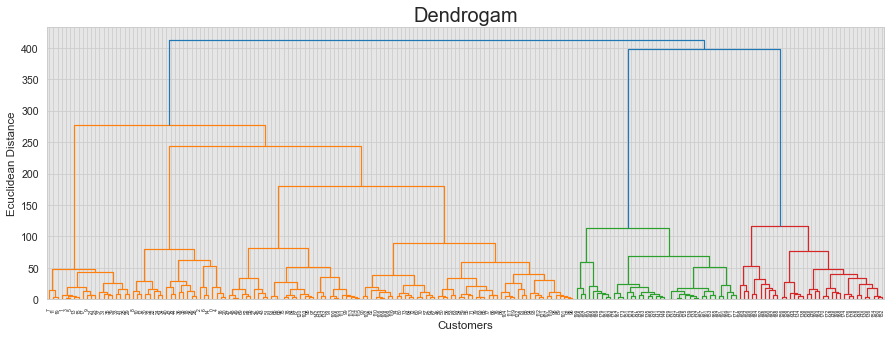

In [23]:
plt.figure(figsize = (15, 5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

**Висновки з завдання 12 (детальні)**

Спробував побудувати дендограми різними способами і, як на мене, найкращі - weighted і ward. В них видно к-ть кластерів.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

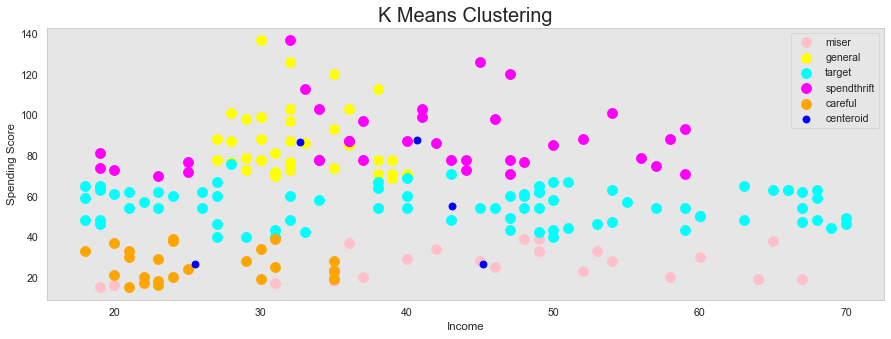

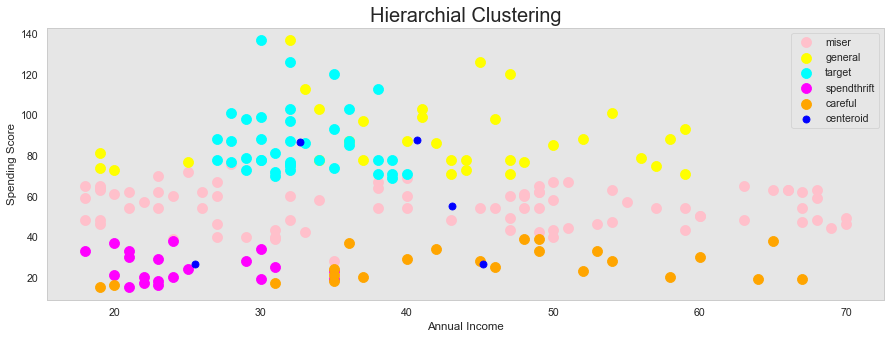

In [25]:
X = customer_set.drop(['Gender'], axis=1).values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

plt.figure(figsize = (15, 5))

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')


plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Income')
plt.ylabel('Spending Score')

plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (15, 5))
X = customer_set.drop(['Gender'], axis=1).values
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

**Висновки з завдання 13 (детальні)**

Як бачимо, графіки практично однакові, лише змінні помінялися місцями (бо вибірка у нас однакова).